In [34]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, TargetEncoder

#Dimensionality Reduction
from sklearn.decomposition import PCA

#Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#Model
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc
)

In [35]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Feature Engineering:**

In [36]:
st_slope_mapping = {"Up": 2, "Flat": 1, "Down": 0}
df["ST_Slope"] = df["ST_Slope"].map(st_slope_mapping)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,2,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,2,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,1,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,1,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,1,1


In [37]:
label_features = ["Sex", "ExerciseAngina"]
label_encoders = {}
for col in label_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,2,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,2,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,1,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,1,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,1,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,1,1


# using target_encoder instead of one_hot_encoding to visualize my data with those columns in mind

In [38]:
target_encode_cols = ["ChestPainType", "RestingECG"]
enc_auto = TargetEncoder(smooth="auto")

df_encoded = enc_auto.fit_transform(df[target_encode_cols], df['HeartDisease'])
df = df.copy()
df[target_encode_cols] = df_encoded
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0.140145,140,289,0,0.522902,172,0,0.0,2,0
1,49,0,0.354777,160,180,0,0.521712,156,0,1.0,1,1
2,37,1,0.146595,130,283,0,0.670767,98,0,0.0,2,0
3,48,0,0.799597,138,214,0,0.514695,108,1,1.5,1,1
4,54,1,0.372989,150,195,0,0.509109,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0.306971,110,264,0,0.521712,132,0,1.2,1,1
914,68,1,0.800101,144,193,1,0.521712,141,0,3.4,1,1
915,57,1,0.792334,130,131,0,0.509109,115,1,1.2,1,1
916,57,0,0.140145,130,236,0,0.575026,174,0,0.0,1,1


# analyzing statistics in the datasets to understand it better:

In [39]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.552602,132.396514,198.799564,0.233115,0.553692,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.269503,18.514154,109.384145,0.423046,0.055639,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.130882,0.000000,0.000000,0.000000,0.509109,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.343315,120.000000,173.250000,0.000000,0.514695,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.778216,130.000000,223.000000,0.000000,0.522902,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,0.792334,140.000000,267.000000,0.000000,0.575026,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,0.800101,200.000000,603.000000,1.000000,0.675483,202.000000,1.000000,6.200000,2.000000,1.000000


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'ChestPainType'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'RestingECG'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'ExerciseAngina'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

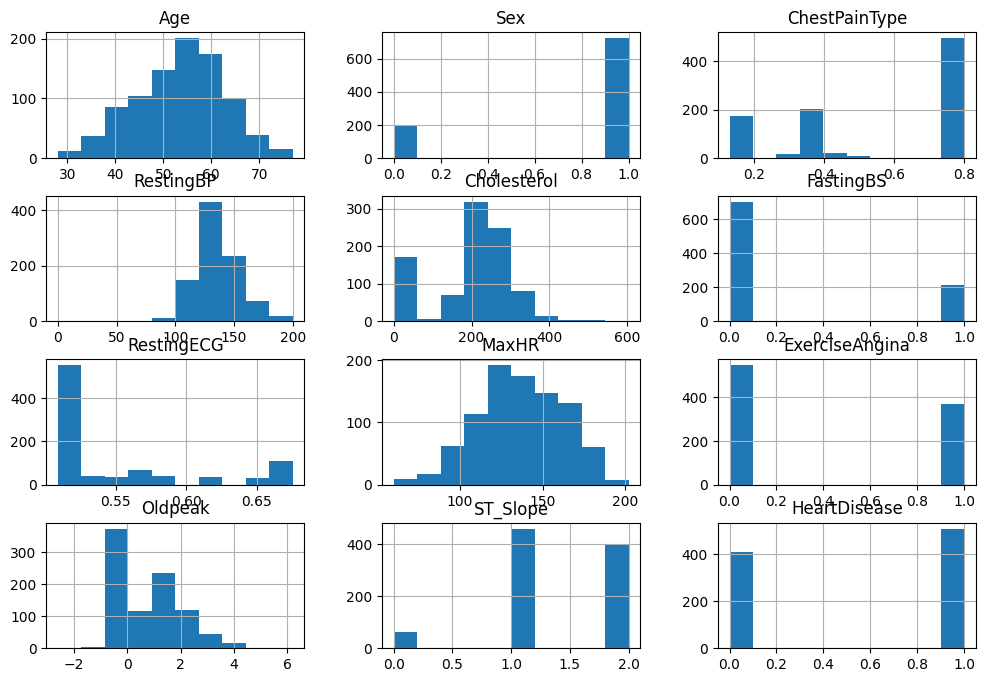

In [40]:
df.hist(figsize=(12, 8))

<Axes: xlabel='HeartDisease'>

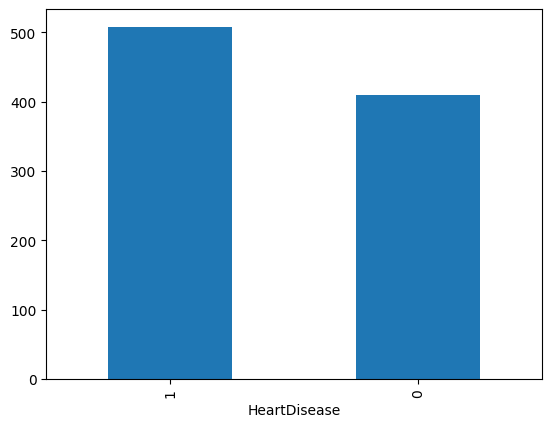

In [41]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [42]:
df.corr()
correlation_matrix = df.corr()
print('correlations between features:' )
print(correlation_matrix)
print('\n')
print('correlation between featrues and target: \n')
print(correlation_matrix['HeartDisease'].sort_values(ascending=False))

correlations between features:
                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750       0.203523   0.254399    -0.095282   
Sex             0.055750  1.000000       0.195101   0.005133    -0.200092   
ChestPainType   0.203523  0.195101       1.000000   0.056842    -0.142567   
RestingBP       0.254399  0.005133       0.056842   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092      -0.142567   0.100893     1.000000   
FastingBS       0.198039  0.120076       0.149631   0.070193    -0.260974   
RestingECG      0.191098  0.045271       0.080775   0.114393    -0.071135   
MaxHR          -0.382045 -0.189186      -0.357396  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664       0.434925   0.155101    -0.034166   
Oldpeak         0.258612  0.105734       0.307742   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693      -0.371909  -0.075162     0.111471   
HeartDisease    0.282039  0.305445       0.53

# visulizing correlations:

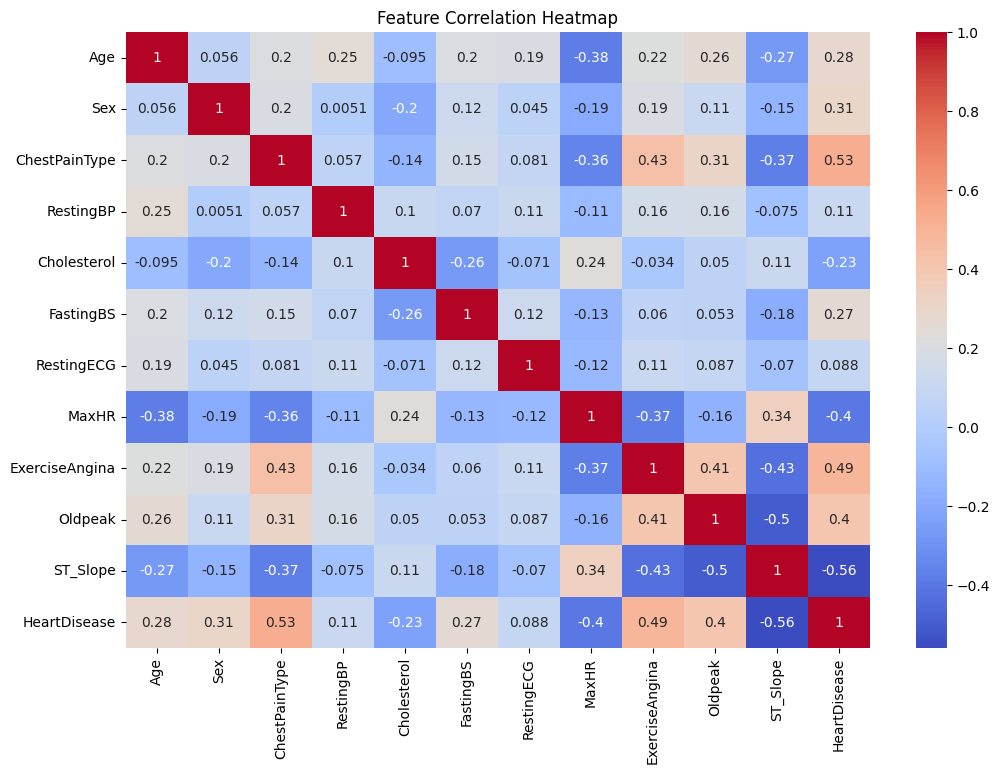

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# splitting the dataset train_test:

In [44]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 1)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
852,43,1,0.778216,120,177,0,0.561238,120,1,2.5,1
121,52,0,0.354777,125,272,0,0.521712,139,0,0.0,2
664,65,0,0.800101,150,225,0,0.540625,114,0,1.0,1
187,41,1,0.792334,120,237,1,0.509109,138,1,1.0,1
108,50,1,0.800101,140,129,0,0.521712,135,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
767,54,0,0.351162,108,267,0,0.561238,167,0,0.0,2
72,52,1,0.792334,120,182,0,0.509109,150,0,0.0,1
908,63,1,0.779608,140,187,0,0.575026,144,1,4.0,2
235,39,1,0.146595,120,200,0,0.513665,160,1,1.0,1


# Scaling:

In [46]:
scaler = StandardScaler()

columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])  # Fit & transform training data
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
852,-1.116200,1,0.778216,-0.705742,-0.182317,0,0.561238,-0.684584,1,1.586322,1
121,-0.149549,0,0.354777,-0.424304,0.672796,0,0.521712,0.069659,0,-0.811060,2
664,1.246726,0,0.800101,0.982886,0.249740,0,0.540625,-0.922766,0,0.147893,1
187,-1.331011,1,0.792334,-0.705742,0.357755,1,0.509109,0.029962,1,0.147893,1
108,-0.364360,1,0.800101,0.420010,-0.614375,0,0.521712,-0.089129,0,-0.811060,2
...,...,...,...,...,...,...,...,...,...,...,...
767,0.065263,0,0.351162,-1.381193,0.627790,0,0.561238,1.181175,0,-0.811060,2
72,-0.149549,1,0.792334,-0.705742,-0.137311,0,0.509109,0.506326,0,-0.811060,1
908,1.031914,1,0.779608,0.420010,-0.092305,0,0.575026,0.268144,1,3.024750,2
235,-1.545823,1,0.146595,-0.705742,0.024710,0,0.513665,0.903296,1,0.147893,1


# Training the model:

In [65]:
classifier = SVC(C=1 ,kernel = 'rbf', gamma=0.1 ,probability=True, random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# confusion matrix:

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

[[ 64  10]
 [  8 102]]
accuracy: 0.9021739130434783
recall: 0.9272727272727272


# ROC  curve:

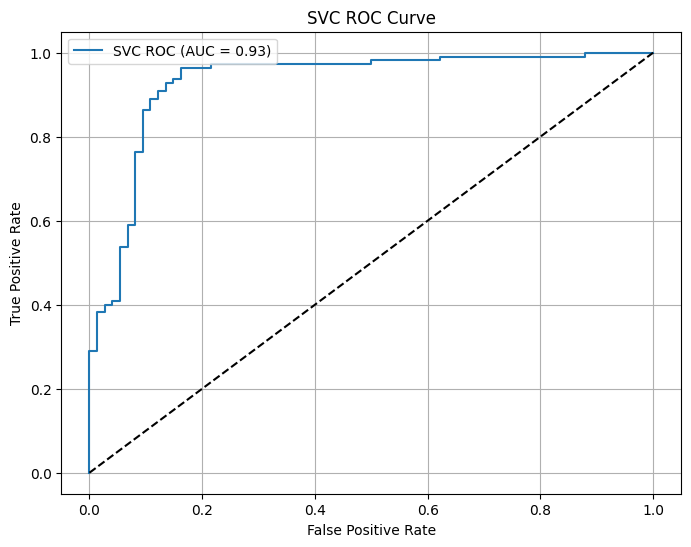

In [67]:
y_scores = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVC ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend()
plt.grid()
plt.show()

# tuning the hyperparameters: (with 'f1' because 'recall' returns terrible accuracy)

In [69]:
param_grid = {
    'C': [0.001,0.01,0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8645825393004094
